In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [2]:
labeled_images=pd.read_csv('train.csv')
images=labeled_images.iloc[0:5000,1:]
labels=labeled_images.iloc[0:5000,:1]
train_images, test_images, train_labels, test_labels=train_test_split(images, labels, train_size=0.8, random_state=0)

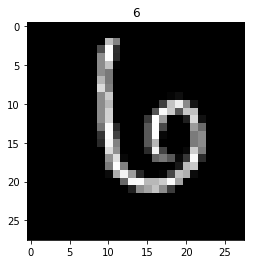

In [3]:
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

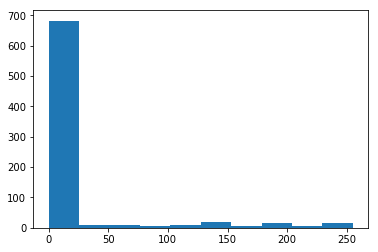

In [4]:
#Examining the Pixel Values
#note that these images aren't actually black and white(0,1). THey are gray-scale(0-255).
#A histogram of this image's pixel valeus shows the range.
plt.hist(train_images.iloc[i])

In [5]:
#Training our model
#First, we use the sklearn.srm module to create a vector classifier.
#Next, we pass our training images and labesl to the classifiers' fil method, which trains our model.
#Finally, the test images and labels are passed to the score method to see how weel we trained our model. FIt will return a float between 0-1 indicating our accuracy on the test data set

clf=svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.10000000000000001

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

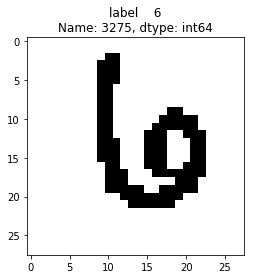

In [7]:
#To raise the porr accuracy of 10%, just simplify our images by making them true black and white
test_images[test_images>0]=1
train_images[train_images>0]=1

image=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

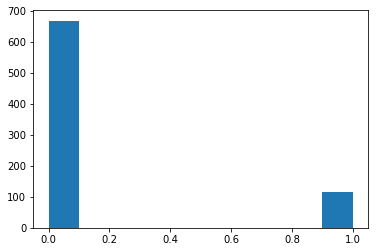

In [8]:
plt.hist(train_images.iloc[i])

In [9]:
#REtraining our model
clf=svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.88700000000000001

In [12]:
#Labelling the test data

test_data=pd.read_csv('test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:5000])


In [13]:
results


array([2, 0, 9, ..., 1, 7, 3], dtype=int64)